#  Word Embeddings

Ashok Kumar Pant | AI Solution Architect | CTO and Co-founder at Treeleaf/Anydone


### Word2Vec
word2vec is the deep learning Google framework to train
word embeddings. It will use all the words of the whole corpus and predict
the nearby words. It will create a vector for all the words present in the
corpus in a way so that the context is captured. It also outperforms any
other methodologies in the space of word similarity and word analogies.

There are mainly 2 types in word2vec.

• Skip-Gram

• Continuous Bag of Words (CBOW)

In [1]:
!pip install gensim

DEPRECATION: Loading egg at /Users/ashokpant/miniconda3/envs/ml/lib/python3.12/site-packages/grpcio-1.69.0-py3.12-macosx-11.0-arm64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/ashokpant/miniconda3/envs/ml/lib/python3.12/site-packages/google_resumable_media-2.7.2-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/ashokpant/miniconda3/envs/ml/lib/python3.12/site-packages/Deprecated-1.2.15-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/a

#### Skip-Grams

Model Information:
Word2Vec<vocab=21, vector_size=50, alpha=0.025>

Vector for 'nlp':
[-1.0724545e-03  4.7286271e-04  1.0206699e-02  1.8018546e-02
 -1.8605899e-02 -1.4233618e-02  1.2917745e-02  1.7945977e-02
 -1.0030856e-02 -7.5267432e-03  1.4761009e-02 -3.0669428e-03
 -9.0732267e-03  1.3108104e-02 -9.7203208e-03 -3.6320353e-03
  5.7531595e-03  1.9837476e-03 -1.6570430e-02 -1.8897636e-02
  1.4623532e-02  1.0140524e-02  1.3515387e-02  1.5257311e-03
  1.2701781e-02 -6.8107317e-03 -1.8928028e-03  1.1537147e-02
 -1.5043275e-02 -7.8722071e-03 -1.5023164e-02 -1.8600845e-03
  1.9076237e-02 -1.4638334e-02 -4.6675373e-03 -3.8754821e-03
  1.6154874e-02 -1.1861792e-02  9.0324880e-05 -9.5074680e-03
 -1.9207101e-02  1.0014586e-02 -1.7519170e-02 -8.7836506e-03
 -7.0199967e-05 -5.9236289e-04 -1.5322480e-02  1.9229487e-02
  9.9641159e-03  1.8466286e-02]

Vector for 'deep':

'deep' not found in the vocabulary


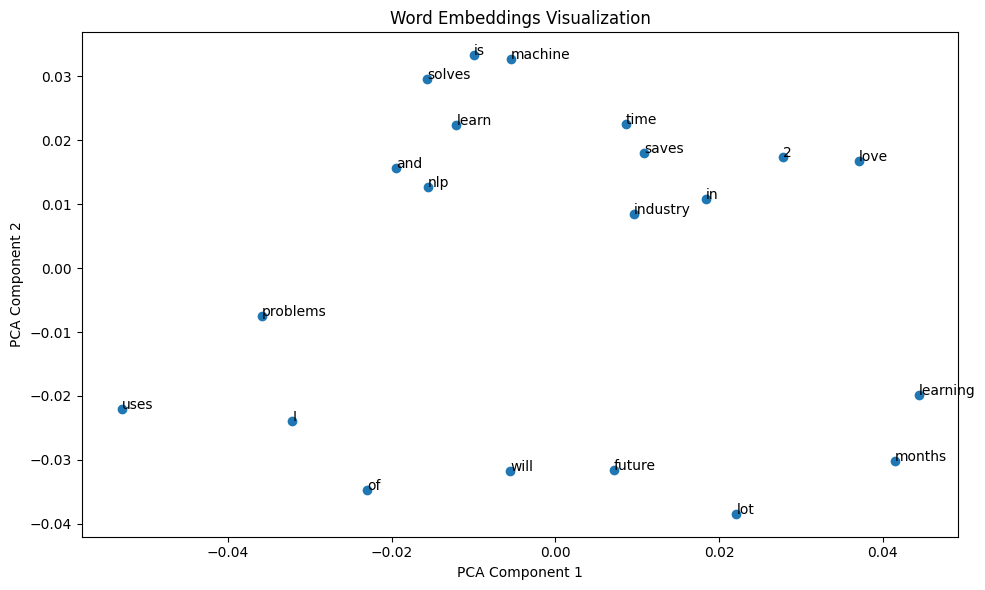

In [1]:
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Define sentences for training
sentences = [
    ['I', 'love', 'nlp'],
    ['I', 'will', 'learn', 'nlp', 'in', '2', 'months'],
    ['nlp', 'is', 'future'],
    ['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems'],
    ['nlp', 'uses', 'machine', 'learning']
]

# Training the Word2Vec model using Skip-gram
skipgram = Word2Vec(sentences, vector_size=50, window=3, min_count=1, sg=1)

# Print model information
print("Model Information:")
print(skipgram)

# Access vector for 'nlp'
print("\nVector for 'nlp':")
print(skipgram.wv['nlp'])

# Try to access vector for 'deep' (might raise a KeyError if not in vocabulary)
try:
    print("\nVector for 'deep':")
    print(skipgram.wv['deep'])
except KeyError:
    print("\n'deep' not found in the vocabulary")

# Save model
skipgram.save('skipgram.bin')

# Load model
loaded_model = Word2Vec.load('skipgram.bin')

# Prepare data for visualization
words = list(skipgram.wv.index_to_key)
vectors = [skipgram.wv[word] for word in words]

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(result[:, 0], result[:, 1])

# Annotate points with words
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.title('Word Embeddings Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.tight_layout()
plt.show()

In [4]:
#### Continuous Bag of Words (CBOW)

Model Information:
Word2Vec<vocab=21, vector_size=50, alpha=0.025>

Vector for 'nlp':
[-1.0724545e-03  4.7286271e-04  1.0206699e-02  1.8018546e-02
 -1.8605899e-02 -1.4233618e-02  1.2917745e-02  1.7945977e-02
 -1.0030856e-02 -7.5267432e-03  1.4761009e-02 -3.0669428e-03
 -9.0732267e-03  1.3108104e-02 -9.7203208e-03 -3.6320353e-03
  5.7531595e-03  1.9837476e-03 -1.6570430e-02 -1.8897636e-02
  1.4623532e-02  1.0140524e-02  1.3515387e-02  1.5257311e-03
  1.2701781e-02 -6.8107317e-03 -1.8928028e-03  1.1537147e-02
 -1.5043275e-02 -7.8722071e-03 -1.5023164e-02 -1.8600845e-03
  1.9076237e-02 -1.4638334e-02 -4.6675373e-03 -3.8754821e-03
  1.6154874e-02 -1.1861792e-02  9.0324880e-05 -9.5074680e-03
 -1.9207101e-02  1.0014586e-02 -1.7519170e-02 -8.7836506e-03
 -7.0199967e-05 -5.9236289e-04 -1.5322480e-02  1.9229487e-02
  9.9641159e-03  1.8466286e-02]


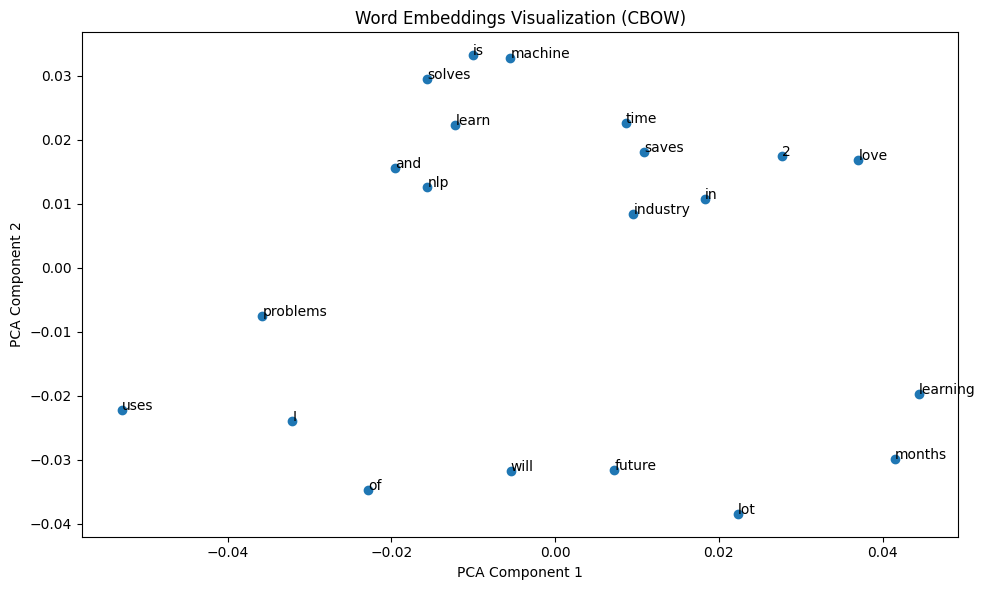

In [5]:
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Example sentences
sentences = [
    ['I', 'love', 'nlp'], 
    ['I', 'will', 'learn', 'nlp', 'in', '2', 'months'], 
    ['nlp', 'is', 'future'], 
    ['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems'], 
    ['nlp', 'uses', 'machine', 'learning']
]

# Training the model using CBOW (Continuous Bag of Words)
# Note: In newer versions of gensim, 'size' is replaced with 'vector_size'
cbow = Word2Vec(sentences, vector_size=50, window=3, min_count=1, sg=0)  # sg=0 for CBOW

# Print model information
print("Model Information:")
print(cbow)

# Access vector for 'nlp'
print("\nVector for 'nlp':")
print(cbow.wv['nlp'])

# Save model
cbow.save('cbow.bin')

# Load model
loaded_model = Word2Vec.load('cbow.bin')

# Prepare data for visualization
words = list(cbow.wv.index_to_key)
vectors = [cbow.wv[word] for word in words]

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(result[:, 0], result[:, 1])

# Annotate points with words
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.title('Word Embeddings Visualization (CBOW)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.tight_layout()
plt.show()

In [ ]:
cbow.wv.most_similar(positive=['king', 'women'], negative=['man'])

### FastText
fastText is the improvised version of word2vec. word2vec basically
considers words to build the representation. But fastText takes each
character while computing the representation of the word.

Vector for 'nlp':
[-0.01044169 -0.00166992  0.00851491 -0.00545158 -0.01564237  0.01678065
  0.00298395  0.00162992 -0.01518791  0.00655623  0.01039656 -0.00142836
 -0.01665709  0.00949577  0.00262534 -0.00541661  0.0063507  -0.00105192
 -0.02014117  0.00102295]

Vector for 'deep':
[-0.00718654 -0.00310375 -0.00214245 -0.00143114 -0.00600196  0.00922425
  0.01241926 -0.00713524 -0.00693269 -0.00987075  0.01335533 -0.00810269
  0.01761531 -0.00716007 -0.00427308  0.00729467  0.01494505 -0.01626069
  0.01229173  0.01455308]


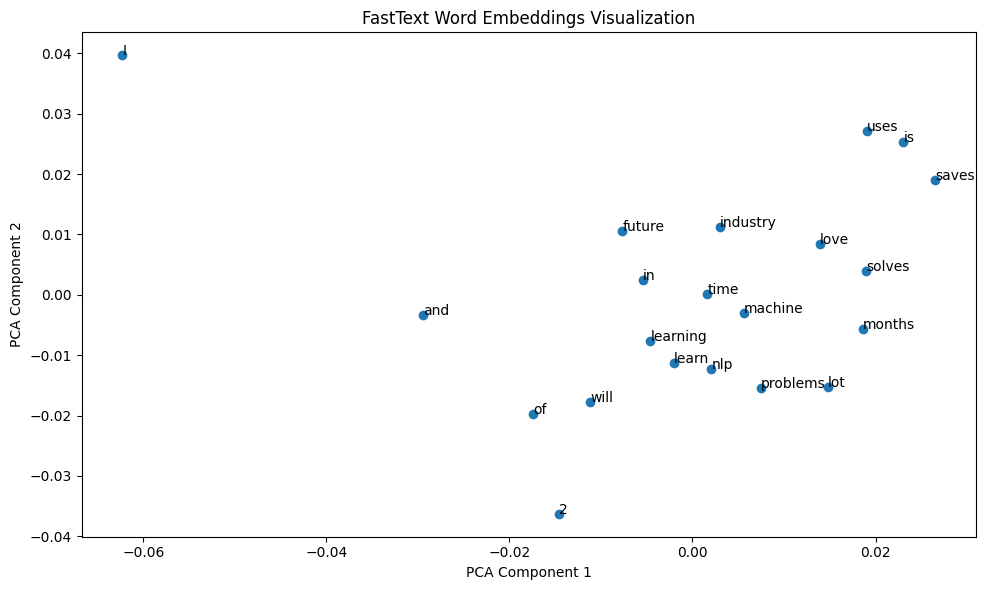


Demonstrating out-of-vocabulary word vector generation:
Vector for 'learning': [-1.4319660e-03 -8.8032829e-03  5.8035087e-03 -7.0009772e-03
  6.7653628e-03  7.7824839e-03 -4.6468023e-03  2.6467426e-03
 -1.2093085e-02 -1.3289730e-03  1.2271232e-02 -1.3941983e-03
 -7.7663572e-04 -6.3592881e-05 -2.3501727e-03 -3.4601411e-03
  2.7132449e-03 -2.5675911e-03 -8.7741194e-03  4.0810667e-03]
Vector for 'deeplearning': [ 0.00016615 -0.00907705  0.0054603  -0.00499235  0.00374246  0.00670306
  0.00401075  0.00099078 -0.00777629 -0.00257187  0.01147093  0.00068806
  0.00494912 -0.00184903 -0.00445926  0.00304775  0.00443293 -0.00946061
 -0.0013443   0.0059427 ]
Vector for 'nlpmodel': [ 0.00701857 -0.01353816  0.00340438 -0.00644233 -0.00359037  0.01470133
  0.00347765 -0.00685188 -0.001351    0.00084853  0.00441824 -0.00040447
 -0.00579791  0.00315513 -0.00208082 -0.00450956 -0.00254191 -0.0024501
 -0.00680244  0.00166426]


In [2]:
from gensim.models import FastText
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Example sentences
sentences = [
    ['I', 'love', 'nlp'], 
    ['I', 'will', 'learn', 'nlp', 'in', '2', 'months'], 
    ['nlp', 'is', 'future'], 
    ['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems'], 
    ['nlp', 'uses', 'machine', 'learning']
]

# Train FastText model
# Note: In newer Gensim versions, 'size' is replaced with 'vector_size'
fast = FastText(
    sentences, 
    vector_size=20,  # Renamed from 'size'
    window=1, 
    min_count=1, 
    workers=5, 
    min_n=1,  # Minimum character n-gram
    max_n=2   # Maximum character n-gram
)

# Demonstrate vector retrieval for words
print("Vector for 'nlp':")
print(fast.wv['nlp'])

print("\nVector for 'deep':")
print(fast.wv['deep'])

# Save the model
fast.save('fast.bin')

# Load the model
# Note: Use FastText.load() instead of Word2Vec.load()
loaded_model = FastText.load('fast.bin')

# Prepare data for visualization
words = list(fast.wv.index_to_key)
vectors = [fast.wv[word] for word in words]

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(result[:, 0], result[:, 1])

# Annotate points with words
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.title('FastText Word Embeddings Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.tight_layout()
plt.show()

# Demonstrate FastText's ability to generate vectors for out-of-vocabulary words
print("\nDemonstrating out-of-vocabulary word vector generation:")
out_of_vocab_words = ['learning', 'deeplearning', 'nlpmodel']
for word in out_of_vocab_words:
    try:
        print(f"Vector for '{word}': {fast.wv[word]}")
    except KeyError:
        print(f"'{word}' not in vocabulary, but FastText can still generate a vector.")

## GloVe

In [9]:
!pip install torchtext

DEPRECATION: Loading egg at /Users/ashokpant/miniconda3/envs/ml/lib/python3.12/site-packages/grpcio-1.69.0-py3.12-macosx-11.0-arm64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/ashokpant/miniconda3/envs/ml/lib/python3.12/site-packages/google_resumable_media-2.7.2-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/ashokpant/miniconda3/envs/ml/lib/python3.12/site-packages/Deprecated-1.2.15-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/a

In [ ]:
import torch

from torchtext.vocab import GloVe

# Load pre-trained GloVe embeddings
glove_vectors = GloVe()
vector_glove = glove_vectors['computer']  # Get vector for 'computer'
print("GloVe vector for 'computer':", vector_glove[:5])  # Show first 5 values

In [ ]:
import gensim
import numpy as np

# Load the pre-trained GloVe vectors (e.g., glove.6B.100d.txt)
# https://nlp.stanford.edu/projects/glove/
glove_file = 'glove.6B.100d.txt'

# Create a dictionary to hold the word embeddings
word_vectors = {}

with open(glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        word_vectors[word] = vector

# Now you can use word_vectors to access the embeddings for words
print(word_vectors['king'])  # Example: print the embedding for 'king'

# Using Gensim to load the GloVe model
from gensim.models.keyedvectors import KeyedVectors

# Convert the word_vectors dictionary to a Gensim KeyedVectors model
word_vectors_gensim = KeyedVectors(vector_size=100)
word_vectors_gensim.add_vectors(list(word_vectors.keys()), list(word_vectors.values()))

# Example usage: Find similarity between words
print(word_vectors_gensim.similarity('king', 'queen'))
